### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.cluster import KMeans

In [17]:
import warnings
warnings.filterwarnings('ignore')

### Data Collection and Analysis

In [4]:
data=pd.read_csv('Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.shape # there are 200 rows and 5 columns

(200, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
data.isnull().sum() # checking for missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
data.duplicated().sum() # no duplicated values

0

In [14]:
# features that we are going to use are Annual Income, spending score 
features=['Annual Income (k$)','Spending Score (1-100)']
X=data[features].copy()

In [46]:
X.iloc[1,:]

Annual Income (k$)        15
Spending Score (1-100)    81
Name: 1, dtype: int64

In [49]:
X.iloc[y==0,0]

43     39
46     40
47     40
48     40
49     40
       ..
121    67
122    69
126    71
132    72
142    76
Name: Annual Income (k$), Length: 81, dtype: int64

#### Choosing the number of clusters
- using WCSS (Within Clusters Sum of Squares)

In [18]:
# finding wcss for different number of clusters
# find minimum wcss 
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156588,
 21850.165282585633,
 19672.07284901432]

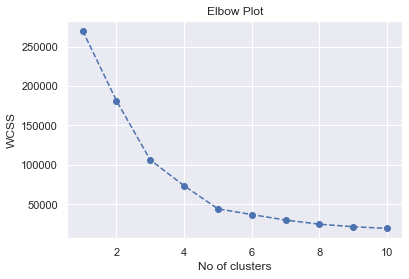

In [21]:
# plot an elbow graph

sns.set() # setting the basic themes
plt.plot(range(1,11),wcss,'o--')
plt.title("Elbow Plot")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

* We have two elbow points, at 3,5.
* We will choose 5 because after this there is no significant drop.
* Optimum no of clusters=5

In [23]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=kmeans.fit_predict(X)
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [31]:
data['Clusters']=kmeans.labels_ # returns label for each data point # here we have 5 clusters - 0,1,2,3,4

In [32]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


### Visualizing the clusters

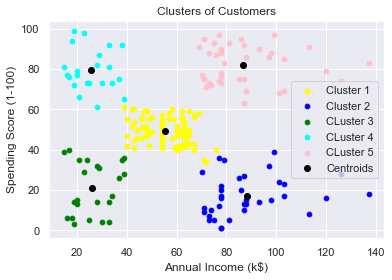

In [50]:
plt.scatter(X.iloc[y==0,0],X.iloc[y==0,1],s=22,c='yellow',label='Cluster 1')
plt.scatter(X.iloc[y==1,0],X.iloc[y==1,1],s=22,c='blue',label='Cluster 2')
plt.scatter(X.iloc[y==2,0],X.iloc[y==2,1],s=22,c='green',label='CLuster 3')
plt.scatter(X.iloc[y==3,0],X.iloc[y==3,1],s=22,c='cyan',label='CLuster 4')
plt.scatter(X.iloc[y==4,0],X.iloc[y==4,1],s=22,c='pink',label='CLuster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


#### Cluster Analysis
* cluster 1 - Average income, Average spending score
* cluster 2 - High income, low spending score
* cluster 3 - low income, low spending score
* cluster 4 - low income, high spending score
* cluster 5 - high income, high spending score

In [51]:
oneData = data.iloc[y == 0, :]
twoData = data.iloc[y == 1, :]
threeData = data.iloc[y == 2, :]
fourData = data.iloc[y == 3, :]
fiveData = data.iloc[y == 4, :]

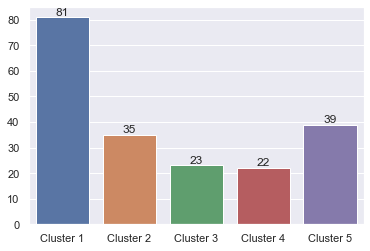

In [55]:
ax = sns.barplot(x = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
                 y = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
ax.bar_label(container=ax.containers[0],labels = [len(oneData), len(twoData), len(threeData), len(fourData), len(fiveData)])
plt.show()

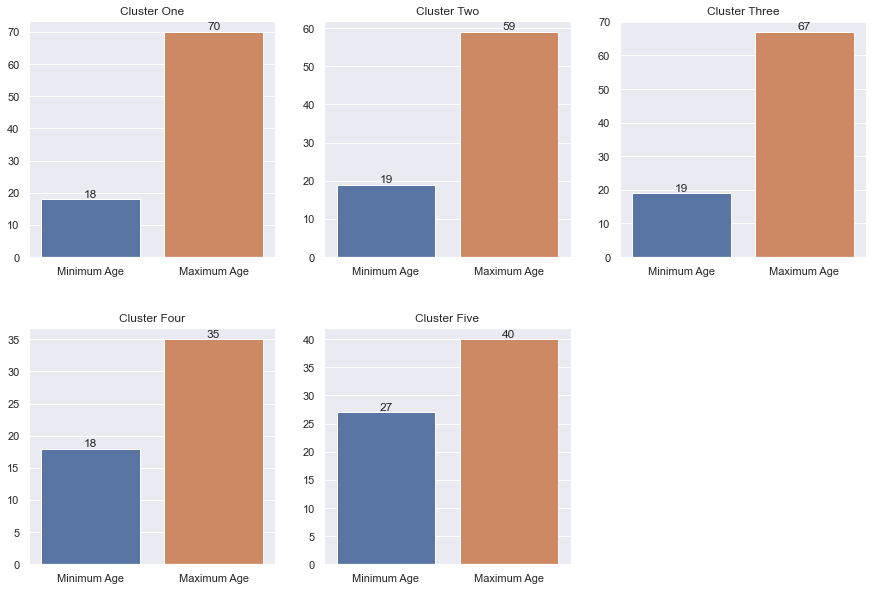

In [56]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [oneData['Age'].min(), oneData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [oneData['Age'].min(), oneData['Age'].max()])
plt.title('Cluster One')

plt.subplot(2,3,2)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [twoData['Age'].min(), twoData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [twoData['Age'].min(), twoData['Age'].max()])
plt.title('Cluster Two')

plt.subplot(2,3,3)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [threeData['Age'].min(), threeData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [threeData['Age'].min(), threeData['Age'].max()])
plt.title('Cluster Three')

plt.subplot(2,3,4)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [fourData['Age'].min(), fourData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [fourData['Age'].min(), fourData['Age'].max()])
plt.title('Cluster Four')

plt.subplot(2,3,5)
ax = sns.barplot(x = ['Minimum Age', 'Maximum Age'], y = [fiveData['Age'].min(), fiveData['Age'].max()])
ax.bar_label(container = ax.containers[0],labels = [fiveData['Age'].min(), fiveData['Age'].max()])
plt.title('Cluster Five')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

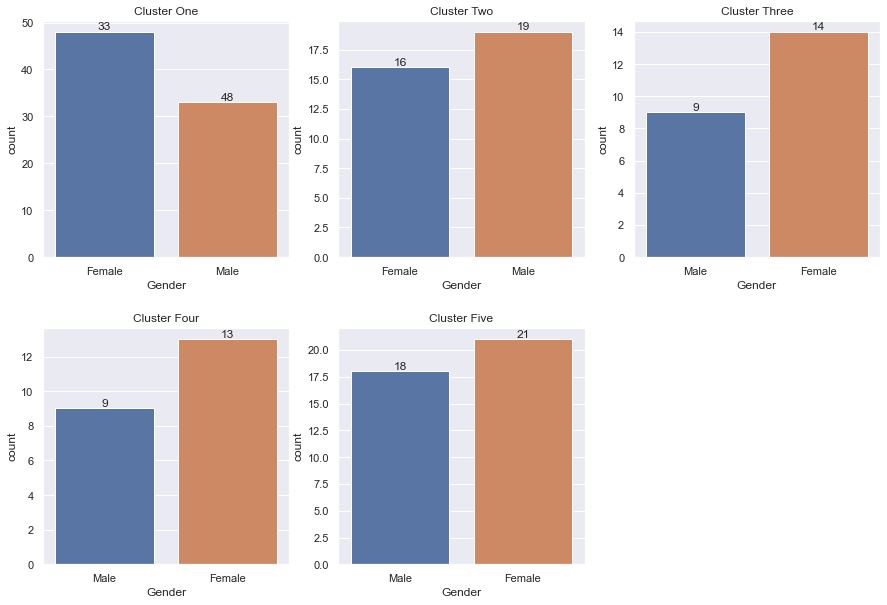

In [57]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
ax = sns.countplot(x = 'Gender', data = oneData)
ax.bar_label(container = ax.containers[0],labels = oneData['Gender'].value_counts(ascending = True))
plt.title('Cluster One')

plt.subplot(2,3,2)
ax = sns.countplot(x = 'Gender', data = twoData)
ax.bar_label(container = ax.containers[0],labels = twoData['Gender'].value_counts(ascending = True))
plt.title('Cluster Two')

plt.subplot(2,3,3)
ax = sns.countplot(x = 'Gender', data = threeData)
ax.bar_label(container = ax.containers[0],labels = threeData['Gender'].value_counts(ascending = True))
plt.title('Cluster Three')

plt.subplot(2,3,4)
ax = sns.countplot(x = 'Gender', data = fourData)
ax.bar_label(container = ax.containers[0],labels = fourData['Gender'].value_counts(ascending = True))
plt.title('Cluster Four')

plt.subplot(2,3,5)
ax = sns.countplot(x = 'Gender', data = fiveData)
ax.bar_label(container = ax.containers[0],labels = fiveData['Gender'].value_counts(ascending = True))
plt.title('Cluster Five')
plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

### Conclusion
* Cluster 1 customers earn decent amount and spend decent amount, they should be sent regular updates and offers.
* Cluster 2 customers has high income , but they do not spend too much. For these customers we can send specific promotions and offers based on past data.
* Cluster 3 customers can be ignored, because they have low income and low spending capacity
* cluster 4 customers have low income and high spending , they should get discount offers.
* cluster 5 customers is the best group, they should be sent regulat updates and offers.